In [3]:
import numpy as np
from scipy.optimize import minimize
from cvxopt import matrix, solvers
import os
import sys

In [4]:
#Prereq Stuff
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt


def linearKernel(X1, X2):
    return X1 @ X2.T


def polyKernel(X1, X2, degree):
    return (X1 @ X2.T + 1) ** degree


def gaussKernel(X1, X2, width):
    distances = cdist(X1, X2, 'sqeuclidean')
    return np.exp(- distances / (2*(width**2)))


def generateData(n, gen_model):

    # Controlling the random seed will give you the same 
    # random numbers every time you generate the data. 
    # The seed controls the internal random number generator (RNG).
    # Different seeds produce different random numbers. 
    # This can be handy if you want reproducible results for debugging.
    # For example, if your code *sometimes* gives you an error, try
    # to find a seed number (0 or others) that produces the error. Then you can
    # debug your code step-by-step because every time you get the same data.

    # np.random.seed(0)  # control randomness when debugging

    if gen_model == 1 or gen_model == 2:
        # Gen 1 & 2
        d = 2
        w_true = np.ones([d, 1])

        X = np.random.randn(n, d)

        if gen_model == 1:
            y = np.sign(X @ w_true)  # generative model 1
        else:
            y = np.sign((X ** 2) @ w_true - 1)  # generative model 2

    elif gen_model == 3:
        # Gen 3
        X, y = generateMoons(n)

    else:
        raise ValueError("Unknown generative model")

    return X, y


def generateMoons(n, noise=0.1):
    n_samples_out = n // 2
    n_samples_in = n - n_samples_out
    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out))
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out))
    inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n_samples_in))
    inner_circ_y = 1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - 0.5

    X = np.vstack(
        [np.append(outer_circ_x, inner_circ_x), 
         np.append(outer_circ_y, inner_circ_y)]
    ).T
    X += np.random.randn(*X.shape) * noise

    y = np.hstack(
        [-np.ones(n_samples_out, dtype=np.intp), 
         np.ones(n_samples_in, dtype=np.intp)]
    )[:, None]
    return X, y


def plotPoints(X, y):
    # plot the data points from two classes
    X0 = X[y.flatten() >= 0]
    X1 = X[y.flatten() < 0]

    plt.scatter(X0[:, 0], X0[:, 1], marker='x', label='class -1')
    plt.scatter(X1[:, 0], X1[:, 1], marker='o', label='class +1')
    return


def getRange(X):
    x_min = np.amin(X[:, 0]) - 0.1
    x_max = np.amax(X[:, 0]) + 0.1
    y_min = np.amin(X[:, 1]) - 0.1
    y_max = np.amax(X[:, 1]) + 0.1
    return x_min, x_max, y_min, y_max


def plotModel(X, y, w, w0, classify):

    plotPoints(X, y)

    # plot model
    x_min, x_max, y_min, y_max = getRange(X)
    grid_step = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))
    z = classify(np.c_[xx.ravel(), yy.ravel()], w, w0)

    # Put the result into a color plot
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.RdBu, alpha=0.5)
    plt.legend()
    plt.show()
    return


def plotAdjModel(X, y, a, a0, kernel_func, adjClassify):

    plotPoints(X, y)

    # plot model
    x_min, x_max, y_min, y_max = getRange(X)
    grid_step = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))
    z = adjClassify(np.c_[xx.ravel(), yy.ravel()], a, a0, X, kernel_func)

    # Put the result into a color plot
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.RdBu, alpha=0.5)
    plt.legend()
    plt.show()
    return


def plotDualModel(X, y, a, b, lamb, kernel_func, dualClassify):

    plotPoints(X, y)

    # plot model
    x_min, x_max, y_min, y_max = getRange(X)
    grid_step = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))
    z = dualClassify(np.c_[xx.ravel(), yy.ravel()], a, b, X, y, 
                     lamb, kernel_func)

    # Put the result into a color plot
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.RdBu, alpha=0.5)
    plt.legend()
    plt.show()

    return


def plotDigit(x):
    img = x.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()
    return



In [5]:
#temp

#q2c
def adjClassify(Xtest, a, a0, X, kernel_func):
    return np.sign( (kernel_func(Xtest,X)@ a + a0)  )

    

/var/folders/bs/lkkv2pps3_j7p6ry213z918m0000gn/T/ipykernel_36570/3306043282.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  regularization = (lamb / 2) * float(alpha.T @ K @ alpha)


Optimized weights: [[-0.15324086]
 [-0.11432499]
 [-0.07064238]
 [-0.23290754]
 [-0.16429861]
 [-0.35146576]
 [-0.37673489]
 [-0.37341022]
 [-0.53741289]
 [-0.46598145]
 [-0.32177331]
 [-0.3613655 ]
 [-0.44455295]
 [-0.43085642]
 [-0.41960129]
 [-0.57373542]
 [-0.39086498]
 [-0.53640506]
 [-0.61572578]
 [-0.60432743]
 [-0.33707276]
 [-0.54761481]
 [-0.56783331]
 [-0.49461776]
 [-0.37659183]
 [-0.48554795]
 [-0.38689795]
 [-0.43993546]
 [-0.17598168]
 [-0.25190013]
 [-0.34022971]
 [-0.18440149]
 [-0.26838386]
 [-0.29072894]
 [-0.13820351]
 [-0.23174594]
 [-0.17431764]
 [-0.48195435]
 [-0.25050232]
 [-0.3058656 ]
 [-0.13868241]
 [-0.33385211]
 [-0.63195559]
 [-0.60347443]
 [-0.28709086]
 [-0.6845051 ]
 [-0.54884367]
 [-0.44460485]
 [-0.0261419 ]
 [-0.26019733]
 [-0.01188425]
 [-0.02183156]
 [ 0.15456147]
 [ 0.16693735]
 [ 0.2637837 ]
 [ 0.39016378]
 [ 0.05765063]
 [ 0.38507267]
 [ 0.51604733]
 [ 0.33509118]
 [ 0.49354072]
 [ 0.52646894]
 [ 0.3973551 ]
 [ 0.60408306]
 [ 0.48939179]
 [ 0.4

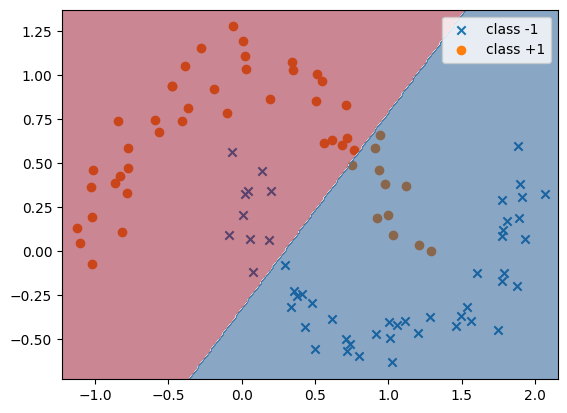

In [6]:
#q2a

def objective_function(params, y, lamb, K):
    n = len(y)
    
    alpha = params[:n]
    alpha = alpha[:,None]
    alpha0 = params[n]
    
    linear_combination = (K @ alpha) + alpha0
    loss = np.sum(np.logaddexp(0, -y * linear_combination))
    
    regularization = (lamb / 2) * float(alpha.T @ K @ alpha)
    return loss + regularization


def adjBinDev(X, y, lamb, kernel_func):
    n, d = X.shape
    K = kernel_func(X, X)
    initial_params = np.ones(n + 1)
    
    result = minimize(objective_function, initial_params, args=(y, lamb, K))
    
    a = result.x[:-1][:,None]
    a0 = result.x[-1]

    return a, a0



#  usage
X,y = generateData(100,3)
lamb = 1
kernel_func = lambda X1, X2 : gaussKernel(X1,X2,8)

a, a0 = adjBinDev(X, y, lamb,kernel_func)

print("Optimized weights:", a)
print("Optimized bias:", a0) 

plotAdjModel(X,y,a,a0,kernel_func,adjClassify)

     pcost       dcost       gap    pres   dres
 0: -8.0038e+01  1.7705e+02  8e+02  4e+00  1e+05
 1:  6.3214e+01 -3.9711e+01  1e+02  5e-01  2e+04
 2:  3.3311e+01 -1.3323e+01  6e+01  2e-01  6e+03
 3:  2.1532e+01 -4.3491e+00  3e+01  6e-02  2e+03
 4:  1.1780e+01 -3.6763e-01  1e+01  3e-02  1e+03
 5:  9.9131e+00 -1.0929e+00  1e+01  2e-02  6e+02
 6:  6.4678e+00  7.4992e-01  6e+00  7e-03  3e+02
 7:  4.7550e+00  1.4916e+00  3e+00  3e-03  1e+02
 8:  4.2855e+00  1.0673e+00  3e+00  1e-03  5e+01
 9:  3.3502e+00  1.9851e+00  1e+00  4e-04  1e+01
10:  2.8896e+00  2.3966e+00  5e-01  7e-06  3e-01
11:  2.5974e+00  2.5824e+00  2e-02  2e-07  7e-03
12:  2.5886e+00  2.5885e+00  2e-04  2e-09  7e-05
Terminated (singular KKT matrix).
Optimized weights: [ 7.85172196e-03  4.16537933e-03  2.71776079e-03 -1.46003633e-03
 -6.63927994e-03 -5.27028342e-03  7.13837380e-04  4.97461277e-03
 -8.65634429e-03  2.31984740e-02 -1.91610168e-02  5.67591773e-03
  2.62621247e-02  1.23837598e-02  7.91491482e-03 -1.38575646e-02
 -

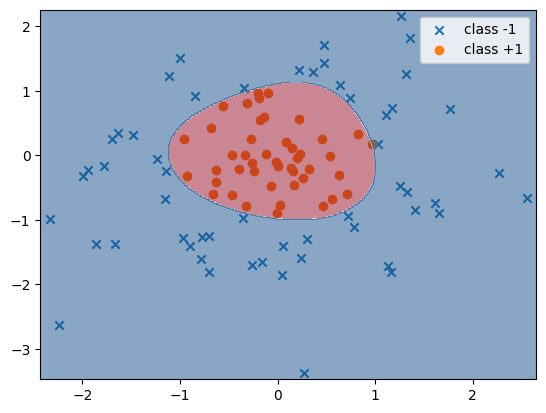

In [33]:
#q2b

def adjHinge(X, y, lamb, kernel_func, stabilizer=1e-5):
    n, d = X.shape
    #print("n = ", n)
    #print("d = ", d)
    K = kernel_func(X, X) 
    
    #print("Shape of y : ", y.shape)


    P = np.zeros((2*n + 1, 2*n+1)) 
    P[:n, :n] = lamb * K  # Kernel matrix for alpha terms
    P = matrix(P + stabilizer * np.eye(2*n+1))  # Stabilization

    q = matrix(np.hstack([np.zeros(n + 1),  np.ones(n)]))
    
    # Create G matrix
    # G1: For the non-negativity constraints of the slack variables 
    G11 = np.zeros([n,n]) #for 1, its nxd
    G12 = np.zeros([n,1])
    G13 = -np.eye(n)
    G1 = np.hstack([G11,G12,G13])
    
    # G2: For the hinge constraints
    G21 = -y * K
    G22 = -y * np.ones([n,1])
    G23 = -np.eye(n)
    G2 = np.hstack([G21,G22,G23])

    G = np.vstack([G1, G2])  # Stack G1 and G2 to form the full G matrix

    # Create the h vector
    h = np.concatenate([np.zeros(n), -np.ones(n)]) 

    # Convert 
    G = matrix(G)
    h = matrix(h)

    solution = solvers.qp(P, q, G, h)

    # Extract solutions for α and α_0
    alphas = np.array(solution['x'][:n])
    alpha0 = np.array(solution['x'][n])

    return alphas, alpha0

# Example usage
X,y = generateData(100,2)
lamb = 1# Regularization parameter

kernel_func = lambda X1, X2 : polyKernel(X1,X2,5)

a, a0 = adjHinge(X, y, lamb,kernel_func)

print("Optimized weights:", a.flatten())
print("Optimized bias:", a0)

plotAdjModel(X,y,a,a0,kernel_func,adjClassify)

In [10]:
#q2c
def adjClassify(Xtest, a, a0, X, kernel_func):
    yhat = np.sign( (kernel_func(Xtest,X)@ a + a0)  )




In [22]:
#q2d

def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def predict(X, alphas, alpha0, kernel, X_support):
    K = kernel(X_support, X)
    predictions = K.T.dot(alphas) + alpha0
    return np.sign(predictions)

def sunExperimentsKernel():
    n_runs = 10 
    n_train = 10
    n_test = 100
    lamb = 0.001
    kernel_list = [linearKernel,
                   lambda X1, X2: polyKernel(X1, X2, 2),
                   lambda X1, X2: polyKernel(X1, X2, 3),
                   lambda X1, X2: gaussKernel(X1, X2, 1.0),
                   lambda X1, X2: gaussKernel(X1, X2, 0.5)]
    
    gen_model_list = [1, 2, 3]
    
    train_acc_bindev = np.zeros([len(kernel_list), len(gen_model_list), n_runs])
    test_acc_bindev = np.zeros([len(kernel_list), len(gen_model_list), n_runs])
    train_acc_hinge = np.zeros([len(kernel_list), len(gen_model_list), n_runs])
    test_acc_hinge = np.zeros([len(kernel_list), len(gen_model_list), n_runs])
    
    for r in range(n_runs):
        for i, kernel in enumerate(kernel_list):
            for j, gen_model in enumerate(gen_model_list):
                Xtrain, ytrain = generateData(n=n_train, gen_model=gen_model)
                Xtest, ytest = generateData(n=n_test, gen_model=gen_model)
                
                # BinDev model
                a, a0 = adjBinDev(Xtrain, ytrain, lamb, kernel)
                train_pred_bindev = predict(Xtrain, a, a0, kernel, Xtrain)
                test_pred_bindev = predict(Xtest, a, a0, kernel, Xtrain)
                train_acc_bindev[i, j, r] = compute_accuracy(ytrain, train_pred_bindev)
                test_acc_bindev[i, j, r] = compute_accuracy(ytest, test_pred_bindev)
                
                # Hinge model
                
                a, a0 = adjHinge(Xtrain, ytrain, lamb, kernel)
                train_pred_hinge = predict(Xtrain, a, a0, kernel, Xtrain)
                test_pred_hinge = predict(Xtest, a, a0, kernel, Xtrain)
                train_acc_hinge[i, j, r] = compute_accuracy(ytrain, train_pred_hinge)
                test_acc_hinge[i, j, r] = compute_accuracy(ytest, test_pred_hinge)
                

    # Compute average accuracies over runs
    train_acc = np.hstack([np.mean(train_acc_bindev,axis = 2), np.mean(train_acc_hinge,axis=2)])
    test_acc = np.hstack([np.mean(test_acc_bindev,axis = 2), np.mean(test_acc_hinge,axis=2)])
    
    # Return or print results
    return train_acc, test_acc


solvers.options['show_progress'] = False

# Call function
train_accuracy, test_accuracy = sunExperimentsKernel()

print(train_accuracy)
print(test_accuracy)


# Print results
print("Average Train Accuracies - Binary Deviance:", train_accuracy[0])
print("Average Test Accuracies - Binary Deviance:", test_accuracy[0])
print("Average Train Accuracies - Hinge:", train_accuracy[1])
print("Average Test Accuracies - Hinge:", train_accuracy[1])



/var/folders/bs/lkkv2pps3_j7p6ry213z918m0000gn/T/ipykernel_13868/3306043282.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  regularization = (lamb / 2) * float(alpha.T @ K @ alpha)
/var/folders/bs/lkkv2pps3_j7p6ry213z918m0000gn/T/ipykernel_13868/3306043282.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  regularization = (lamb / 2) * float(alpha.T @ K @ alpha)


[[1.   0.69 0.8  1.   0.78 0.79]
 [1.   1.   0.8  1.   1.   0.84]
 [1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.  ]
 [1.   1.   1.   1.   1.   1.  ]]
[[0.917 0.545 0.829 0.899 0.588 0.831]
 [0.829 0.733 0.84  0.822 0.734 0.819]
 [0.885 0.784 0.973 0.881 0.774 0.959]
 [0.818 0.842 0.986 0.83  0.852 0.944]
 [0.782 0.804 0.997 0.795 0.808 0.994]]
Average Train Accuracies - Binary Deviance: [1.   0.69 0.8  1.   0.78 0.79]
Average Test Accuracies - Binary Deviance: [0.917 0.545 0.829 0.899 0.588 0.831]
Average Train Accuracies - Hinge: [1.   1.   0.8  1.   1.   0.84]
Average Test Accuracies - Hinge: [1.   1.   0.8  1.   1.   0.84]
